In [1]:
import spatialproteomics as sp
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import medfilt2d
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
ds = xr.open_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_zscore.zarr")


In [8]:
#ds_2_4 = ds_2_4.transpose("channels", "y", "x", "cells", "features")

In [4]:
ds

<xarray.Dataset> Size: 824MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 57301, features: 2)
Coordinates:
  * cells          (cells) int64 458kB 1 2 3 4 5 ... 57298 57299 57300 57301
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
Data variables:
    _image         (channels, y, x) uint8 682MB dask.array<chunksize=(2, 1133, 941), meta=np.ndarray>
    _intensity     (cells, channels) float64 5MB dask.array<chunksize=(14326, 5), meta=np.ndarray>
    _obs           (cells, features) float64 917kB dask.array<chunksize=(28651, 1), meta=np.ndarray>
    _segmentation  (y, x) uint16 136MB dask.array<chunksize=(567, 941), meta=np.ndarray>

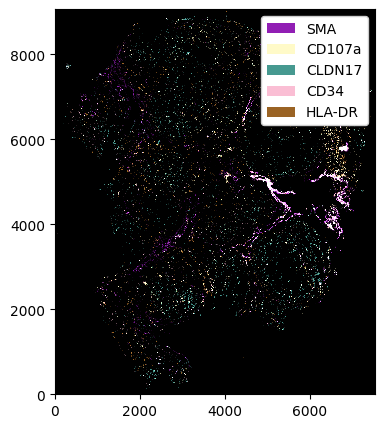

In [8]:

channels = ['DAPI', 'Ki67', 'Keratin5', 'CD68', 'Podoplanin', 'SMA', 'CD107a', 'CLDN17',
       'CD34', 'HLA-DR']
colors = [
    "#911eb4",
    "#fffac8",
    "#469990",
    "#fabed4",
    "#9A6324",
]
channels_celltypes = channels[-5:]
# plotting the ds and ds processed next to one another

plt.figure(figsize=(10,5))

_ = ds.pp[channels_celltypes].pl.colorize(colors).pl.show()






In [11]:
marker_dict = {
    
    "Keratin5": "basal tumor cells",
    "CLDN17": "classical tumor cells",
    "CD68": "Macrophages",
    "CD107a": "Cytotoxic T cells or NK cells",
    "HLA-DR": "APC",
    "SMA": "myCAFs",
    "Ki67": "Proliferating",
    "CD34": "Endothelial cells",
    "Podoplanin": "myCAFs",

}

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

colors = list(cm.tab20(np.linspace(0, 1, 9)))


# predicting the cell type using the argmay
ds_predictions = ds.la.predict_cell_types_argmax(
    marker_dict, key="_intensity", overwrite_existing_labels=True
)

# adding colors to match the markers

ds_predictions = ds_predictions.la.set_label_colors(list(marker_dict.values()), colors)



Text(0.5, 1.0, 'Cell Type Predictions')

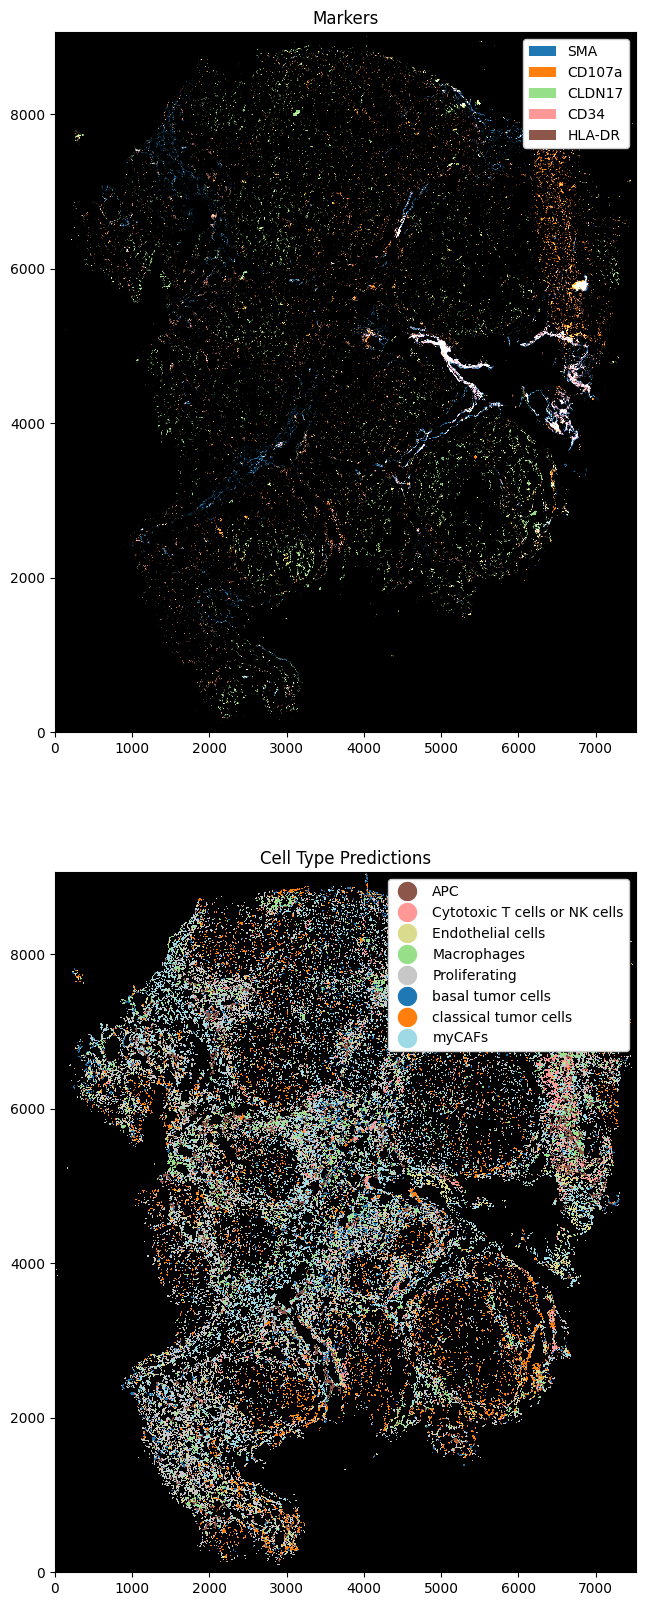

In [13]:
# plotting the ct predictions next to the processed image
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

_ = ds_predictions.pp[channels_celltypes].pl.colorize(colors).pl.show(ax=ax[0])
_ = ds_predictions.pl.show(render_image=False, render_labels=True, ax=ax[1])

ax[0].set_title("Markers")
ax[1].set_title("Cell Type Predictions")

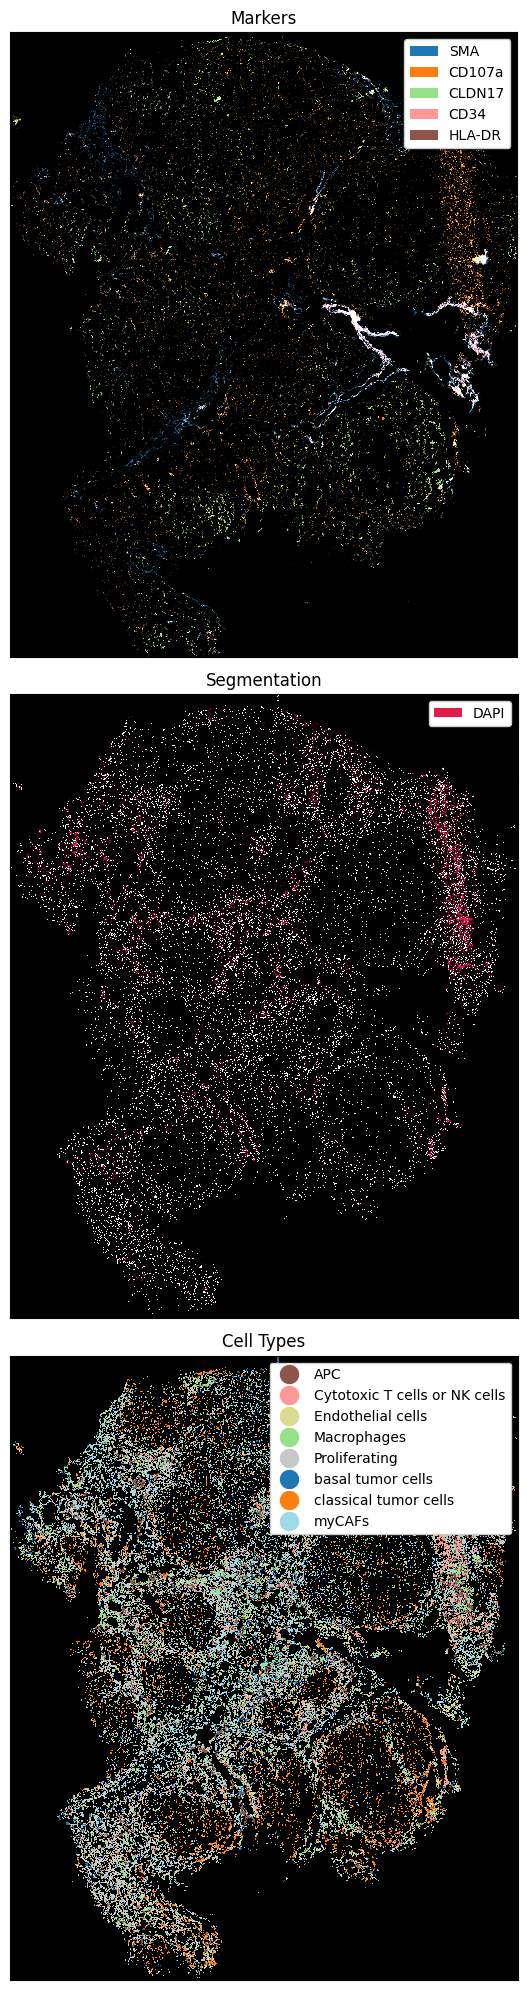

In [16]:
# this is how the image in the README was created
fig, ax = plt.subplots(3, 1, figsize=(60, 20))
_ = ds.pp[channels_celltypes].pl.colorize(colors).pl.autocrop(padding=100).pl.show(ax=ax[0])
_ = ds.pp["DAPI"].pl.autocrop(padding=100).pl.show(render_segmentation=True, ax=ax[1])
_ = ds_predictions.pl.autocrop(padding=100).pl.show(render_image=False, render_labels=True, ax=ax[2])


# removing the x and y ticks
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

# setting titles
ax[0].set_title("Markers")
ax[1].set_title("Segmentation")
ax[2].set_title("Cell Types")

plt.tight_layout()

In [17]:
ds_predictions.pp.get_layer_as_df("_obs", celltypes_to_str=True)

,_labels,centroid-0,centroid-1
1,Proliferating,92.625000,2869.565000
2,Proliferating,97.783673,2897.142857
3,Proliferating,125.727273,2377.690909
4,Proliferating,130.502463,2225.532020
5,Proliferating,136.861446,2854.680723
...,...,...,...
57297,basal tumor cells,8985.936441,4038.423729
57298,APC,9019.704797,4032.282288
57299,basal tumor cells,9024.479592,4022.629252
57300,Endothelial cells,9026.044776,4014.492537


In [18]:
ds

<xarray.Dataset> Size: 824MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 57301, features: 2)
Coordinates:
  * cells          (cells) int64 458kB 1 2 3 4 5 ... 57298 57299 57300 57301
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
Data variables:
    _image         (channels, y, x) uint8 682MB dask.array<chunksize=(2, 1133, 941), meta=np.ndarray>
    _intensity     (cells, channels) float64 5MB dask.array<chunksize=(14326, 5), meta=np.ndarray>
    _obs           (cells, features) float64 917kB dask.array<chunksize=(28651, 1), meta=np.ndarray>
    _segmentation  (y, x) uint16 136MB dask.array<chunksize=(567, 941), meta=np.ndarray>

In [19]:
seg = ds["_segmentation"].values

ds_for_astir = (
    ds
    .pp.drop_layers("_obs")
    .pp.add_segmentation(seg)      
)

In [20]:
ds_for_astir


<xarray.Dataset> Size: 824MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 57301, features: 2)
Coordinates:
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
  * cells          (cells) int64 458kB 1 2 3 4 5 ... 57298 57299 57300 57301
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 682MB dask.array<chunksize=(2, 1133, 941), meta=np.ndarray>
    _intensity     (cells, channels) float64 5MB dask.array<chunksize=(14326, 5), meta=np.ndarray>
    _segmentation  (y, x) uint16 136MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 917kB 92.62 2.87e+03 ... 4.024e+03

In [21]:
# using astir to predict cell types
# note the slightly different structure of the marker dictionary
ct_marker_dict = {
    "cell_type": {
        
        "Cytotoxic T or NK": ["CD107a"],

        "Macro": ["CD68"],

        "myCAFs": ["Podoplanin"],

        "Endothelial cells": ["CD34"],

        "classical tumor cells": ["CLDN17"],

        "APC": ["HLA-DR"],

        "basal tumor cells": ["Keratin5"],

        "myCAFs": ["SMA"],

        "Proliferating": ["Ki67"],

    }
}
ds_with_ct_predictions_astir = ds_for_astir.tl.astir(ct_marker_dict)


training restart (final):   2%|▏         | 9/500 [19.59s/epochs, current loss: 635910.3]


In [22]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# adding custom colors and adding observations back in
cell_types = [

        "Cytotoxic T or NK",

        "Macro",

        "myCAFs",
        "Endothelial cells",

        "classical tumor cells",
        "APC",

        "basal tumor cells",

        "Proliferating",
    
]


# 从三个 matplotlib colormap 中获取颜色
colors = list(cm.tab20(np.linspace(0, 1, 8)))  # 共 24 个颜色

ds_with_ct_predictions_astir = ds_with_ct_predictions_astir.la.set_label_colors(
    cell_types, colors ).pp.add_observations()



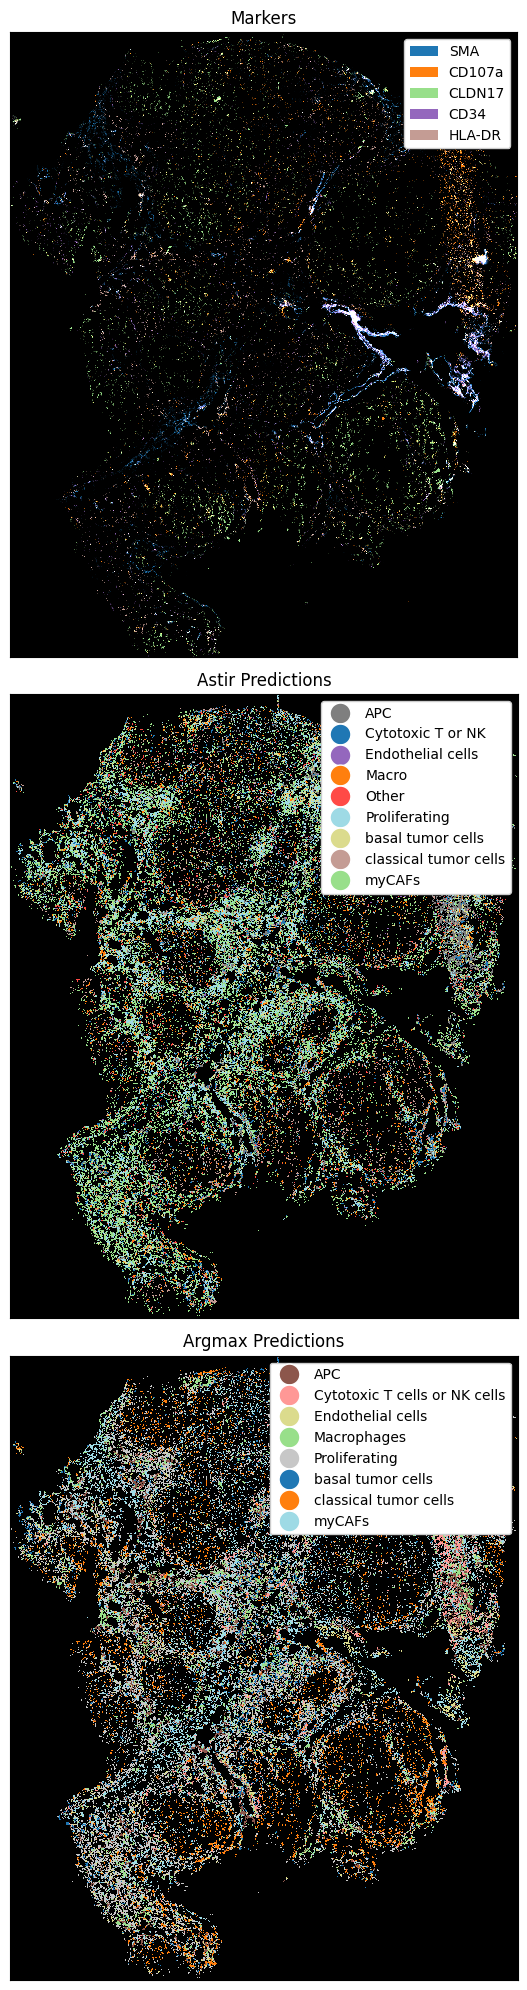

In [23]:

# plotting the astir and the argmax predictions
fig, ax = plt.subplots(3,1, figsize=(60, 20))
_ = ds.pp[channels_celltypes].pl.colorize(colors).pl.autocrop(padding=100).pl.show(ax=ax[0])
_ = ds_with_ct_predictions_astir.pl.autocrop(padding=100).pl.show(render_image=False, render_labels=True, ax=ax[1])
_ = ds_predictions.pl.autocrop(padding=100).pl.show(render_image=False, render_labels=True, ax=ax[2])

# removing the x and y ticks
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

# setting titles
ax[0].set_title("Markers")
ax[1].set_title("Astir Predictions")
ax[2].set_title("Argmax Predictions")

plt.tight_layout()